1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2

In [2]:
survey = pd.read_csv('CP1 Stack Overflow Database.csv')

3

In [3]:
# Contagem de colunas numéricas
numeric_columns_count = survey.select_dtypes(include=['int64', 'float64']).shape[1]

# Memória utilizada pelo dataframe em MB
memory_usage_MB = survey.memory_usage(deep=True).sum() / (1024 ** 2)

print(f"Número de colunas numéricas: {numeric_columns_count}")
print(f"Memória utilizada pelo dataframe: {memory_usage_MB:.2f} MB")


Número de colunas numéricas: 4
Memória utilizada pelo dataframe: 475.58 MB


4

In [4]:
survey_new = survey[['MainBranch', 'Age', 'Employment', 'RemoteWork', 'EdLevel', 'DevType', 'OrgSize', 'Country', 'ConvertedCompYearly', 'WorkExp', 'Industry']]
print(survey_new)

                           MainBranch                 Age  \
0                       None of these     18-24 years old   
1      I am a developer by profession     25-34 years old   
2      I am a developer by profession     45-54 years old   
3      I am a developer by profession     25-34 years old   
4      I am a developer by profession     25-34 years old   
...                               ...                 ...   
89179  I am a developer by profession     25-34 years old   
89180  I am a developer by profession     18-24 years old   
89181     I code primarily as a hobby   Prefer not to say   
89182  I am a developer by profession  Under 18 years old   
89183  I am a developer by profession     35-44 years old   

                                              Employment  \
0                                                    NaN   
1                                    Employed, full-time   
2                                    Employed, full-time   
3                          

5

In [5]:
# Contagem de colunas numéricas no novo dataframe
numeric_columns_count_new = survey_new.select_dtypes(include=['int64', 'float64']).shape[1]

# Memória utilizada pelo novo dataframe em MB
memory_usage_MB_new = survey_new.memory_usage(deep=True).sum() / (1024 ** 2)

print(f"Número de colunas numéricas: {numeric_columns_count_new}")
print(f"Memória utilizada pelo dataframe: {memory_usage_MB_new:.2f} MB")


Número de colunas numéricas: 2
Memória utilizada pelo dataframe: 64.03 MB


6

In [6]:

media = survey_new['ConvertedCompYearly'].mean()
mediana = survey_new['ConvertedCompYearly'].median()
desvio_padrao = survey_new['ConvertedCompYearly'].std()
maximo = survey_new['ConvertedCompYearly'].max()
minimo = survey_new['ConvertedCompYearly'].min()

print(f"Média: {media}")
print(f"Mediana: {mediana}")
print(f"Desvio-padrão: {desvio_padrao}")
print(f"Máximo: {maximo}")
print(f"Mínimo: {minimo}")


Média: 103110.08171765343
Mediana: 74963.0
Desvio-padrão: 681418.8387120209
Máximo: 74351432.0
Mínimo: 1.0


7

In [7]:

Q1 = survey_new['ConvertedCompYearly'].quantile(0.25)
Q3 = survey_new['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f"Limite inferior: {limite_inferior}")
print(f"Limite superior: {limite_superior}")


Limite inferior: -72694.0
Limite superior: 238242.0


8

In [8]:

outliers = survey_new[(survey_new['ConvertedCompYearly'] > limite_superior) | (survey_new['ConvertedCompYearly'] < limite_inferior)]
numero_de_outliers = outliers.shape[0]

print(f"Número de outliers: {numero_de_outliers}")


Número de outliers: 2206


9

In [9]:
porcentagens = survey_new['RemoteWork'].value_counts(normalize=True) * 100

print(porcentagens)


RemoteWork
Hybrid (some remote, some in-person)    42.177212
Remote                                  41.411733
In-person                               16.411055
Name: proportion, dtype: float64


10

In [10]:

agrupados = survey_new.groupby('RemoteWork')['ConvertedCompYearly'].agg(['mean', 'median'])

print(agrupados)


                                               mean   median
RemoteWork                                                  
Hybrid (some remote, some in-person)  100216.214934  72714.0
In-person                              70646.002145  51953.0
Remote                                112141.268001  87681.0


11

In [11]:
setores_unicos = survey_new['Industry'].nunique()

print(f"Número de setores únicos: {setores_unicos}")

Número de setores únicos: 12


12

In [12]:

survey_country = survey_new[survey_new['Country'].isin(['United States of America', 'United Kingdom of Great Britain and Northern Ireland', 'Canada'])]
media_desvio_pais = survey_country.groupby('Country')['ConvertedCompYearly'].agg(['mean', 'std'])
observacoes = survey_country.shape[0]
maior_media = media_desvio_pais['mean'].idxmax()
maior_desvio = media_desvio_pais['std'].idxmax()

print(media_desvio_pais)
print(f"Observações: {observacoes}")
print(f"País com maior média de salários: {maior_media}")
print(f"País com maior desvio padrão: {maior_desvio}")


                                                             mean  \
Country                                                             
Canada                                              142136.677435   
United Kingdom of Great Britain and Northern Ir...   95948.670429   
United States of America                            170783.961199   

                                                             std  
Country                                                           
Canada                                              1.627436e+06  
United Kingdom of Great Britain and Northern Ir...  7.360685e+04  
United States of America                            1.808044e+05  
Observações: 27706
País com maior média de salários: United States of America
País com maior desvio padrão: Canada


13

In [13]:
# Porcentagem de respondentes por formato de trabalho no 'survey_country'
porcentagens_country = survey_country['RemoteWork'].value_counts(normalize=True) * 100

print(porcentagens_country)

# Comparação do número de trabalhadores remotos entre 'survey_new' e 'survey_country'
num_remotos_survey_new = (survey_new['RemoteWork'] == "Remoto").sum()
num_remotos_survey_country = (survey_country['RemoteWork'] == "Remoto").sum()

print(f"Trabalhadores remotos em 'survey_new': {num_remotos_survey_new}")
print(f"Trabalhadores remotos em 'survey_country': {num_remotos_survey_country}")



RemoteWork
Remote                                  53.003474
Hybrid (some remote, some in-person)    35.493323
In-person                               11.503202
Name: proportion, dtype: float64
Trabalhadores remotos em 'survey_new': 0
Trabalhadores remotos em 'survey_country': 0


14

In [14]:

survey_country_ind = survey_country[survey_country['Industry'].isin(['Information Services, IT, Software Development, or other Technology', 'Financial Services', 'Insurance'])]
media_salarios = survey_country_ind.groupby(['Country', 'Industry'])['ConvertedCompYearly'].mean()

print(media_salarios)


Country                                               Industry                                                           
Canada                                                Financial Services                                                     115690.544828
                                                      Information Services, IT, Software Development, or other Technology    237403.632867
                                                      Insurance                                                               91870.437500
United Kingdom of Great Britain and Northern Ireland  Financial Services                                                     129646.465374
                                                      Information Services, IT, Software Development, or other Technology     92379.093317
                                                      Insurance                                                               92203.851064
United States of America                    

15      

In [15]:
# Média de anos de experiência 'WorkExp' para cada indústria 'Industry'
media_exp_por_industria = survey_country_ind.groupby('Industry')['WorkExp'].mean()

# Indústria com a maior média de anos de experiência
industria_maior_exp = media_exp_por_industria.idxmax()

# Indústria com a menor média de anos de experiência
industria_menor_exp = media_exp_por_industria.idxmin()

print(media_exp_por_industria)
print(f"Indústria com mais experiência: {industria_maior_exp}")
print(f"Indústria com menos experiência: {industria_menor_exp}")


Industry
Financial Services                                                     13.304947
Information Services, IT, Software Development, or other Technology    14.178653
Insurance                                                              13.530744
Name: WorkExp, dtype: float64
Indústria com mais experiência: Information Services, IT, Software Development, or other Technology
Indústria com menos experiência: Financial Services


16

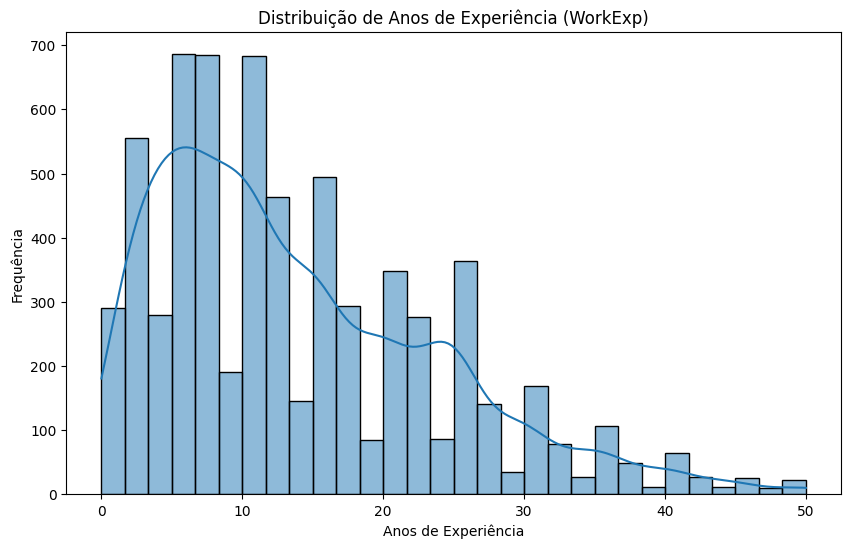

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(survey_country_ind['WorkExp'], bins=30, kde=True)
plt.title('Distribuição de Anos de Experiência (WorkExp)')
plt.xlabel('Anos de Experiência')
plt.ylabel('Frequência')
plt.show()


17

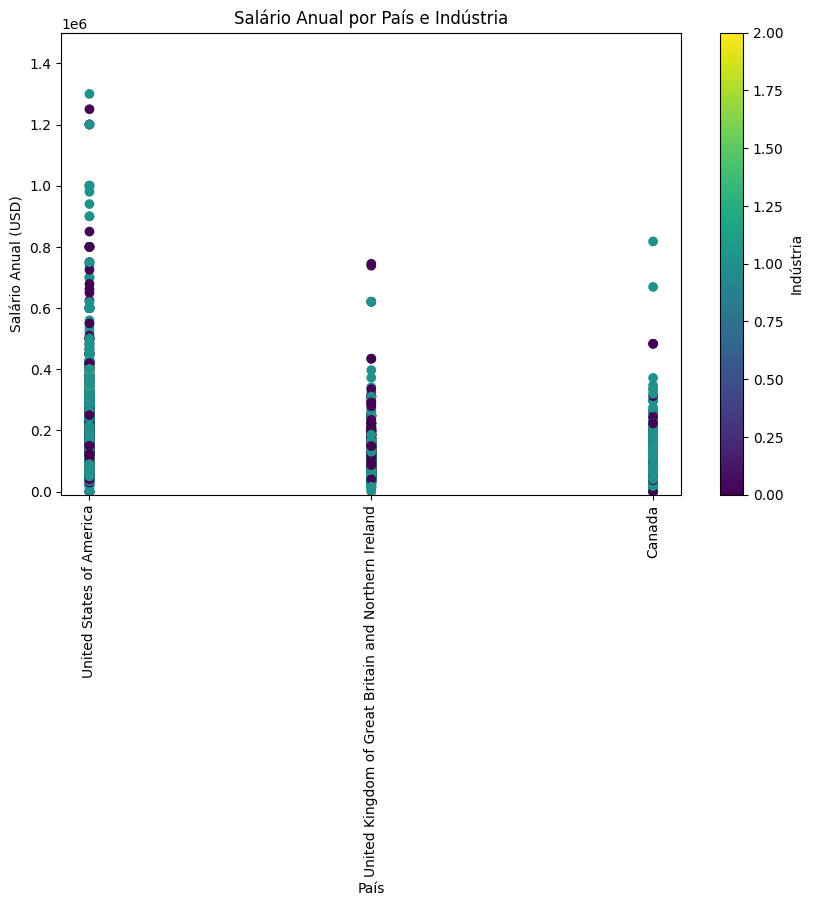

In [17]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x=survey_country_ind['Country'], y=survey_country_ind['ConvertedCompYearly'], c=survey_country_ind['Industry'].astype('category').cat.codes)
plt.xticks(rotation=90)
plt.ylim(-10000, 1500000)
plt.title('Salário Anual por País e Indústria')
plt.xlabel('País')
plt.ylabel('Salário Anual (USD)')
plt.colorbar(scatter, label='Indústria')
plt.show()


18

C:\Users\Pedro\AppData\Local\Temp\ipykernel_12228\3407566160.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=survey_country_ind, x='Country', y='ConvertedCompYearly', palette="Set3")


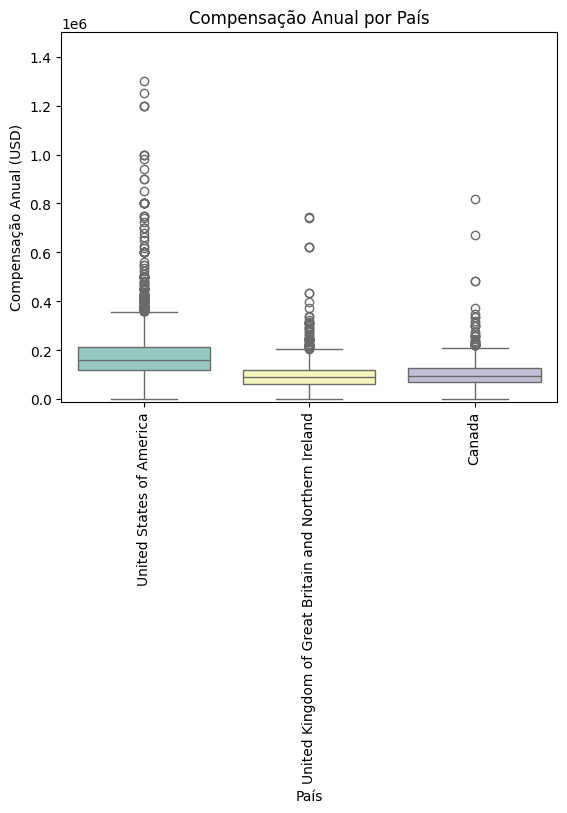

In [18]:
sns.boxplot(data=survey_country_ind, x='Country', y='ConvertedCompYearly', palette="Set3")

plt.xticks(rotation=90) # Rotacionando os nomes no eixo x em 90 graus
plt.ylim(-10000, 1500000) # Limitando os valores do eixo y

plt.title('Compensação Anual por País')
plt.xlabel('País')
plt.ylabel('Compensação Anual (USD)')
plt.show()

19

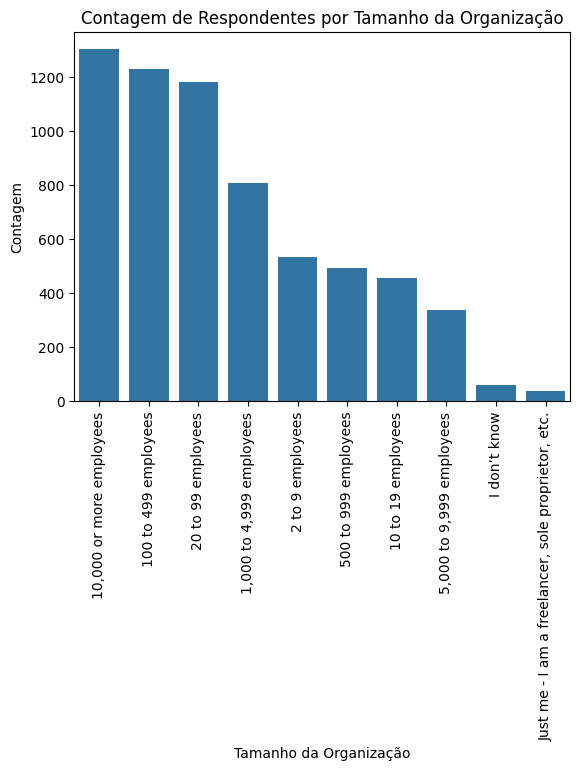

O tamanho das empresas predominante onde trabalham os respondentes destes países é: 10,000 or more employees


In [19]:
sns.countplot(data=survey_country_ind, x='OrgSize', order=survey_country_ind['OrgSize'].value_counts().index)

plt.xticks(rotation=90) # Rotacionando os nomes no eixo x em 90 graus
plt.title('Contagem de Respondentes por Tamanho da Organização')
plt.xlabel('Tamanho da Organização')
plt.ylabel('Contagem')
plt.show()

# Para determinar o tamanho das empresas predominante
tamanho_predominante = survey_country_ind['OrgSize'].value_counts().idxmax()
print(f"O tamanho das empresas predominante onde trabalham os respondentes destes países é: {tamanho_predominante}")

20

C:\Users\Pedro\AppData\Local\Temp\ipykernel_12228\3768247111.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=survey_country_ind, x='RemoteWork', y='WorkExp', palette="muted", split=True)


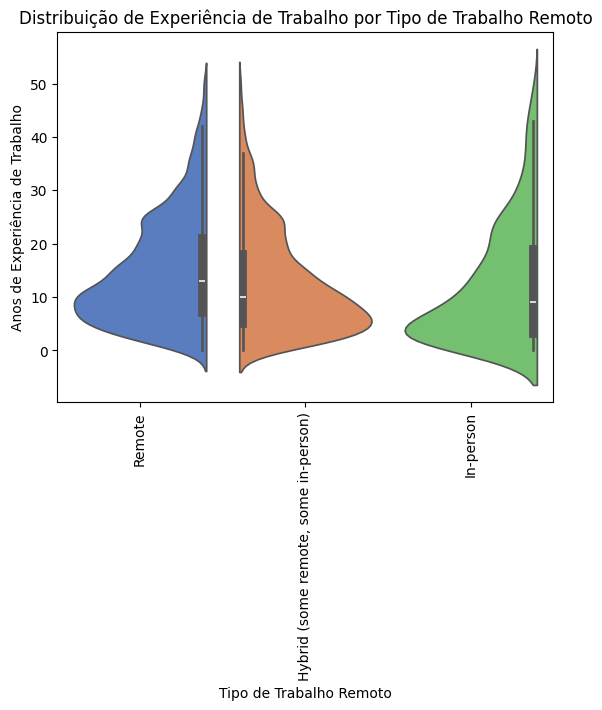

In [20]:
# Geração de um gráfico de violino
sns.violinplot(data=survey_country_ind, x='RemoteWork', y='WorkExp', palette="muted", split=True)

plt.xticks(rotation=90) # Rotacionando os nomes no eixo x em 90 graus
plt.title('Distribuição de Experiência de Trabalho por Tipo de Trabalho Remoto')
plt.xlabel('Tipo de Trabalho Remoto')
plt.ylabel('Anos de Experiência de Trabalho')
plt.show()
